# **Exercicio Duelo de Modelos 4**

Nesta tarefa, vocês irão criar o seu próprio duelo de modelos, com o objetivo de superar os resultados apresentados em aula. O desafio é alcançar um desempenho superior ao que obtivemos, e para isso, será necessário aplicar todas as melhorias que vocês aprenderam ao longo dos módulos, utilizando a base de dados do Titanic.

**1. Escolha do Modelo:**
Selecione um dos modelos que foram explorados nos duelos de modelos ao longo do curso. Pode ser SVM, Random Forest, XGBoost, ou qualquer outro que tenhamos abordado.

**2. Aperfeiçoamento:**
**Aplique as técnicas que aprendemos para melhorar o desempenho do seu modelo:**

**Hiperparâmetros:** Utilize GridSearchCV ou RandomSearchCV para encontrar os melhores parâmetros.

**Cross Validation:** Avalie a robustez do modelo utilizando validação cruzada para garantir que ele generaliza bem.

**Balanceamento de Classes:** Se o seu modelo lida com problemas de classes desbalanceadas, explore técnicas como SMOTE, undersampling ou oversampling.

**Padronização e Normalização:** Lembre-se de padronizar os dados, especialmente se for usar modelos que são sensíveis à escala das variáveis.

**3. Submissão no Kaggle:**
Treine o seu modelo com os dados de treino e gere as previsões para os dados de teste. Lembre-se de que o conjunto de teste não possui a variável alvo (y_test), pois a avaliação será feita com base nas submissões no Kaggle.
Submeta suas previsões na competição do Titanic no Kaggle.

**4. Entrega:**
Envie o código que você desenvolveu, detalhando cada etapa do seu processo de modelagem, explicando as escolhas feitas e como essas ajudaram a melhorar o modelo.

Junto com o código, envie um print do seu score obtido na plataforma do Kaggle. Esse score será a sua métrica final de avaliação, mostrando como o seu modelo se compara com os demais.

**5. Competição Saudável:**
A ideia é trazer um senso de competição saudável, então não vale replicar exatamente o que fizemos na aula! Inove, explore novas combinações de parâmetros e técnicas, e mostre do que é capaz. O importante é exercitar o pensamento crítico e a capacidade de experimentar.

**Dicas Finais:**

Seja criativo e tenha um olhar crítico sobre o que pode ser melhorado.
Teste diferentes abordagens e não se prenda a um único caminho.
Lembre-se de que, mais do que alcançar o melhor score, o objetivo é aprender e aplicar o conhecimento de forma prática e eficaz.
Boa sorte! Estamos ansiosos para ver como cada um de vocês vai se sair nesse desafio e quais insights irão surgir dessa competição!

Ao final dessa atividade vocês terão participado da primeira competição publica de ciência de dados de vocês = )




In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [11]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [12]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [14]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
#train_df.dropna(subset=['Embarked'], inplace=True)
#test_df.dropna(subset=['Embarked'], inplace=True)

In [18]:
train_df = train_df.drop(columns=['Name','Ticket'])

In [19]:
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

In [20]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

C:\Users\dudir\AppData\Local\Temp\ipykernel_21204\623714052.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
C:\Users\dudir\AppData\Local\Temp\ipykernel_21204\623714052.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [21]:
train_df = pd.get_dummies(train_df, columns=['Embarked'], prefix='Embarked')
test_df = pd.get_dummies(test_df, columns=['Embarked'], prefix='Embarked')

In [22]:
train_df['Cabin_known'] = train_df['Cabin'].notna().astype(int)
test_df['Cabin_known'] = test_df['Cabin'].notna().astype(int)

train_df = train_df.drop(columns=['Cabin'])
test_df_teste = test_df.drop(columns=['Cabin'])

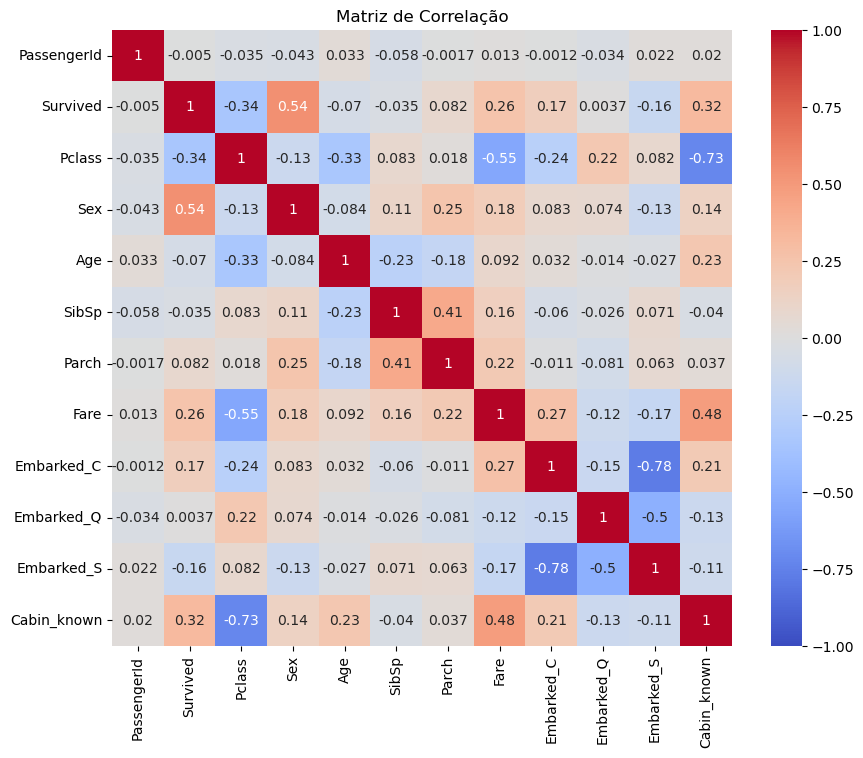

In [23]:
correlation_matrix = train_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

In [24]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_known
0,1,0,3,0,22.000000,1,0,7.2500,False,False,True,0
1,2,1,1,1,38.000000,1,0,71.2833,True,False,False,1
2,3,1,3,1,26.000000,0,0,7.9250,False,False,True,0
3,4,1,1,1,35.000000,1,0,53.1000,False,False,True,1
4,5,0,3,0,35.000000,0,0,8.0500,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,False,False,True,0
887,888,1,1,1,19.000000,0,0,30.0000,False,False,True,1
888,889,0,3,1,29.699118,1,2,23.4500,False,False,True,0
889,890,1,1,0,26.000000,0,0,30.0000,True,False,False,1


In [25]:
variaveis = ['Sex', 'Cabin_known', 'Fare', 'Pclass', 'Age', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [54]:
X = train_df[variaveis]
y = train_df['Survived']

X_test = test_df[variaveis]

In [27]:
smote = SMOTE(random_state=42)

X_train_balanced, Y_train_balanced = smote.fit_resample(X, y)

In [28]:
scaler = StandardScaler()

X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

In [29]:
print(f"Tamanho do conjunto de treino balanceado: {X_train_balanced_scaled.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test_scaled.shape[0]}")

Tamanho do conjunto de treino balanceado: 1098
Tamanho do conjunto de teste: 418


In [30]:
print("Distribuição das classes antes do balanceamento:")
print(y.value_counts())

Distribuição das classes antes do balanceamento:
Survived
0    549
1    342
Name: count, dtype: int64


In [31]:
print("\nDistribuição das classes depois do balanceamento:")
print(Y_train_balanced.value_counts())


Distribuição das classes depois do balanceamento:
Survived
0    549
1    549
Name: count, dtype: int64


In [32]:
rf_duelo = RandomForestClassifier(random_state=42)

In [33]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 20, 35],
    'min_samples_split': [2, 4, 7, 10],
    'min_samples_leaf': [1, 2, 4, 7, 10],
    'max_features': ['sqrt', 'log2', None]
}

In [34]:
gs_rf = GridSearchCV(rf_duelo, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [35]:
gs_rf.fit(X_train_balanced_scaled, Y_train_balanced)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20, 35],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4, 7, 10],
                         'min_samples_split': [2, 4, 7, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [36]:
bp_rf = gs_rf.best_params_
print(f"Melhores parâmetros: {bp_rf}")

Melhores parâmetros: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 100}


In [37]:
best_floresta_model = gs_rf.best_estimator_
best_floresta_model.fit(X_train_balanced_scaled, Y_train_balanced)

RandomForestClassifier(max_depth=10, max_features=None, min_samples_split=7,
                       random_state=42)

In [38]:
Y_pred_arvore = best_floresta_model.predict(X_train_balanced_scaled)
report_arvore = classification_report(Y_train_balanced, Y_pred_arvore)
print("Relatório de Métricas - Modelo com Grid Search (Árvore de Decisão):\n", report_arvore)

Relatório de Métricas - Modelo com Grid Search (Árvore de Decisão):
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       549
           1       0.94      0.87      0.91       549

    accuracy                           0.91      1098
   macro avg       0.91      0.91      0.91      1098
weighted avg       0.91      0.91      0.91      1098



In [42]:
Y_pred = best_floresta_model.predict(X_test_scaled)

In [46]:
sub_forest = pd.Series(Y_pred, index=test_df['PassengerId'], name = 'Survived')

In [60]:
sub_forest.to_csv("sub_forest.csv" , header=True)